In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '.2'
plt.rcParams['axes.facecolor'] = 'black' 

In [2]:
def lift(arr):
    arr = np.array(arr)
    return arr.reshape((arr.shape[0], 1))

grades = np.array([[11, 8, 15, 6, 9, 12, 6, 6, 12, 9, 3, 14, 11, 14, 6, 6, 8, 12, 3, 9, 12],
                   [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]])  

data = np.c_[grades[0,:], grades[1,:]]
data[:, 1]

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [3]:
X = data[:, 0]
Y = data[:, 1]

s = list(map(lambda x, y: 30 * len(X[(X == x) & (Y == y)]), X, Y))

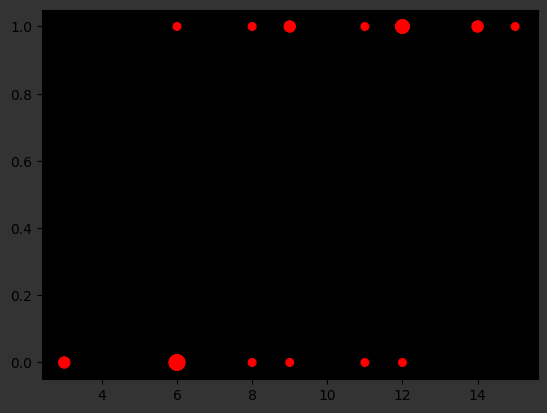

In [4]:
plt.scatter(X,Y ,c='r', s=s)
plt.show()

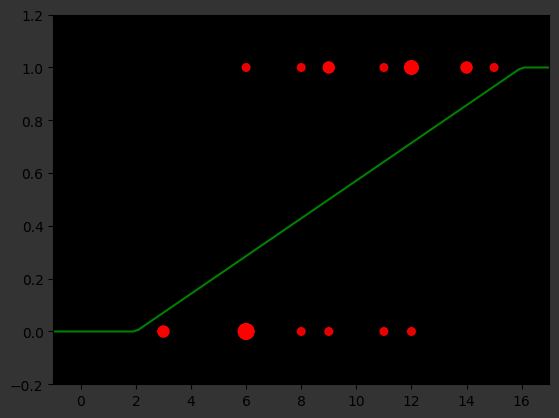

In [5]:
def prob(grade):
    if grade > 16:
        return 1
    if grade < 2:
        return 0
    return 1/14 * grade - 1/7

g = np.linspace(-1,17,100)

plt.axis([-1,17,-0.2,1.2])
plt.plot(g, list(map(prob,g)), color='green')
plt.scatter(X,Y ,c='r', s=s, alpha= .9)
plt.show()

In [6]:
probX = np.array(list(map(prob, X)))
probX

array([0.64285714, 0.42857143, 0.92857143, 0.28571429, 0.5       ,
       0.71428571, 0.28571429, 0.28571429, 0.71428571, 0.5       ,
       0.07142857, 0.85714286, 0.64285714, 0.85714286, 0.28571429,
       0.28571429, 0.42857143, 0.71428571, 0.07142857, 0.5       ,
       0.71428571])

In [7]:
%time _probGrades = np.array(list(map(prob,range(1,1000000))))

CPU times: total: 1.86 s
Wall time: 1.87 s


In [8]:
%time probGrades = np.array([prob(i) for i in range(1,1000000)])

CPU times: total: 1.88 s
Wall time: 1.9 s


In [9]:
probGrades = np.array([prob(i) for i in range(1,16)])

In [10]:
#prob for each grade 
{i: probGrades[i-1] for i in range(1,16)}

{1: 0.0,
 2: 0.0,
 3: 0.07142857142857142,
 4: 0.14285714285714285,
 5: 0.21428571428571425,
 6: 0.2857142857142857,
 7: 0.35714285714285715,
 8: 0.42857142857142855,
 9: 0.49999999999999994,
 10: 0.5714285714285714,
 11: 0.6428571428571428,
 12: 0.7142857142857142,
 13: 0.7857142857142856,
 14: 0.8571428571428572,
 15: 0.9285714285714286}

In [11]:
Y_predict = (probX >= .5) * 1
Y_predict

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [12]:
Y

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [13]:
np.sum(Y_predict == Y)

15

In [14]:
def predictor(boundary):
    def inner_func(grade):
        return 1 if grade >= boundary else 0
    return inner_func

def predictor(boundary):
    return lambda grade: 1 if grade >= boundary else 0

predictor = lambda boundary: lambda grade: 1 if grade >= boundary else 0

In [15]:
for b in range(0, 16):
    print(b, np.sum(np.array(list(map(predictor(b), X))) == Y))

0 11
1 11
2 11
3 11
4 13
5 13
6 13
7 16
8 16
9 16
10 15
11 15
12 15
13 13
14 13
15 11


In [16]:
X

array([11,  8, 15,  6,  9, 12,  6,  6, 12,  9,  3, 14, 11, 14,  6,  6,  8,
       12,  3,  9, 12])

In [17]:
Y

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [18]:
pX = np.array(list(map(prob, X)))
pX

array([0.64285714, 0.42857143, 0.92857143, 0.28571429, 0.5       ,
       0.71428571, 0.28571429, 0.28571429, 0.71428571, 0.5       ,
       0.07142857, 0.85714286, 0.64285714, 0.85714286, 0.28571429,
       0.28571429, 0.42857143, 0.71428571, 0.07142857, 0.5       ,
       0.71428571])

In [19]:
#comparing the models predictions to the actual grades data
like = Y * pX + (1 - Y) * (1 - pX)

In [20]:
np.prod(like)

3.2016337809171925e-05

In [21]:
#coinflip estimation
1 / (2**21)

4.76837158203125e-07

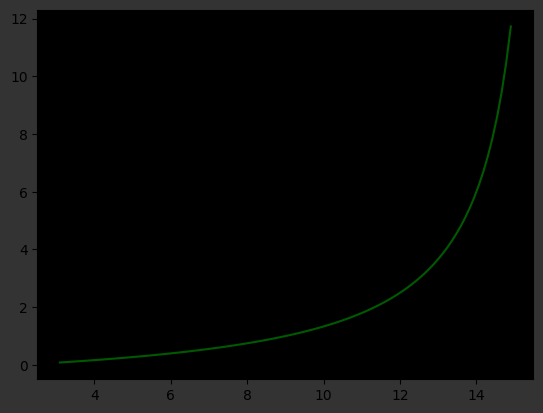

In [22]:
odds = lambda x: prob(x) / (1 - prob(x))

g = np.linspace(3.1, 14.9, 100)
comprehension = [odds(i) for i in g]

#plt.plot(g, list(map(odds, g)), color='green', alpha=.7)
plt.plot(g, comprehension, color='green', alpha=.7)

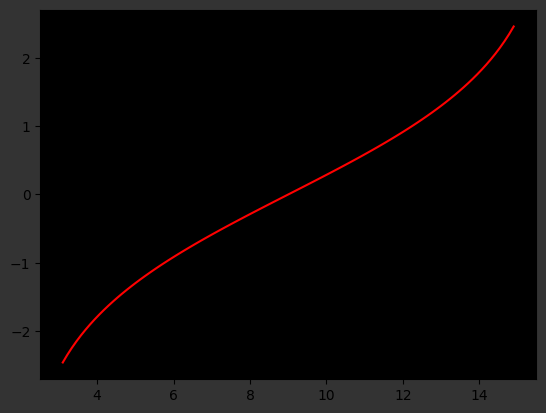

In [23]:
L1 = np.array(list(map(np.log, map(odds, g))))
L = np.log([odds(i) for i in g])
plt.plot(g, L, c='red')

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(lift(g), lift(L))

LinearRegression()

In [25]:
beta = model.predict([[0]])[0,0]
alpha = model.predict([[1]])[0,0] - beta

beta, alpha

(-3.152078223316115, 0.3502309137017905)

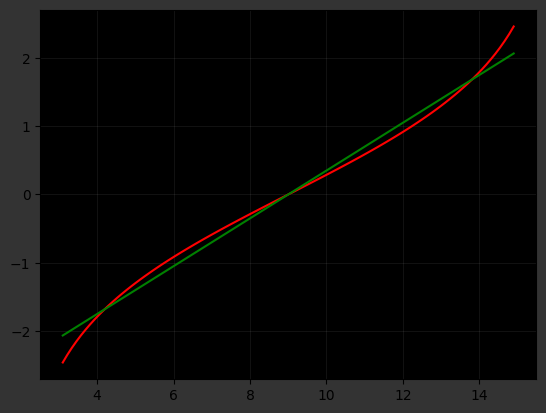

In [26]:
plt.plot(g, L, 'r', g, alpha * g + beta, 'g')
plt.grid(alpha=.1)

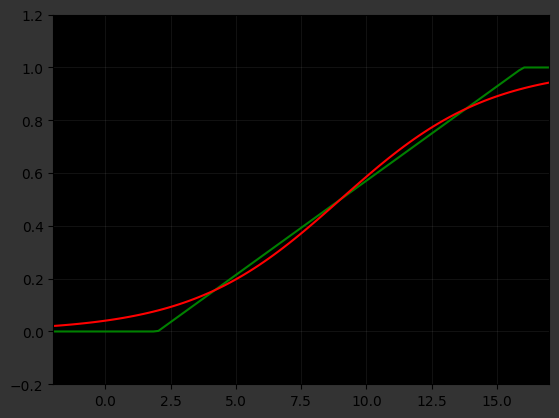

In [27]:
g = np.linspace(-2, 17, 100)
plt.axis([-2, 17, -.2, 1.2])
plt.plot(g, list(map(prob, g)), 'g',
         g, np.exp(alpha * g + beta) / (1 + np.exp(alpha * g + beta)), 'r')
plt.grid(alpha=.1)

In [28]:
pX = np.exp(alpha * X + beta) / (1 + np.exp(alpha * X + beta))
pX

array([0.66829016, 0.41332643, 0.89103777, 0.2590921 , 0.5       ,
       0.7409079 , 0.2590921 , 0.2590921 , 0.7409079 , 0.5       ,
       0.10896223, 0.85209837, 0.66829016, 0.85209837, 0.2590921 ,
       0.2590921 , 0.41332643, 0.7409079 , 0.10896223, 0.5       ,
       0.7409079 ])

In [29]:
X

array([11,  8, 15,  6,  9, 12,  6,  6, 12,  9,  3, 14, 11, 14,  6,  6,  8,
       12,  3,  9, 12])

In [50]:
like = Y * pX + (1 - Y) * (1 - pX)
like

array([0.66829016, 0.58667357, 0.89103777, 0.7409079 , 0.5       ,
       0.2590921 , 0.7409079 , 0.7409079 , 0.7409079 , 0.5       ,
       0.89103777, 0.85209837, 0.33170984, 0.85209837, 0.2590921 ,
       0.7409079 , 0.41332643, 0.7409079 , 0.89103777, 0.5       ,
       0.7409079 ])

In [54]:
like.prod()

2.83954569352842e-05

In [80]:
from sklearn.linear_model import LogisticRegression
X_T = X[:, np.newaxis]

In [81]:
model = LogisticRegression()
model.fit(X_T, Y)

LogisticRegression()

In [72]:
model.predict([[4]])

array([0])

In [92]:
sk_predict = model.predict(X_T)
np.sum(sk_predict == Y)

16

In [98]:
sk_pX = model.predict_proba(X_T)
sk_pX

array([[0.2743521 , 0.7256479 ],
       [0.59637983, 0.40362017],
       [0.05786364, 0.94213636],
       [0.78568475, 0.21431525],
       [0.48401831, 0.51598169],
       [0.19356582, 0.80643418],
       [0.78568475, 0.21431525],
       [0.78568475, 0.21431525],
       [0.19356582, 0.80643418],
       [0.48401831, 0.51598169],
       [0.93475674, 0.06524326],
       [0.08820844, 0.91179156],
       [0.2743521 , 0.7256479 ],
       [0.08820844, 0.91179156],
       [0.78568475, 0.21431525],
       [0.78568475, 0.21431525],
       [0.59637983, 0.40362017],
       [0.19356582, 0.80643418],
       [0.93475674, 0.06524326],
       [0.48401831, 0.51598169],
       [0.19356582, 0.80643418]])

In [108]:
sk_like = np.prod(sk_pX[:,1] * Y + (sk_pX[:,0]) * (1 - Y))
sk_like

3.5038406152048204e-05

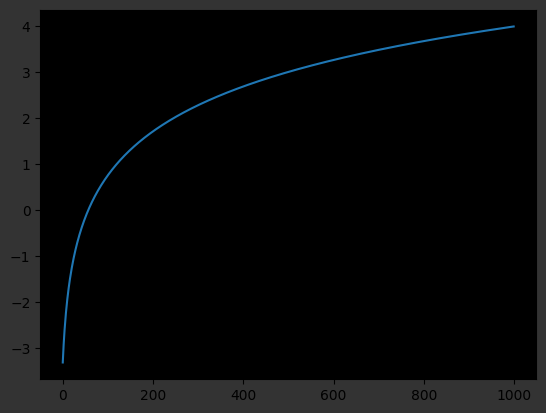

In [30]:
plt.plot(np.log2(np.linspace(.1,16,1000)))

In [31]:
b = np.linspace(20, 40, 100)

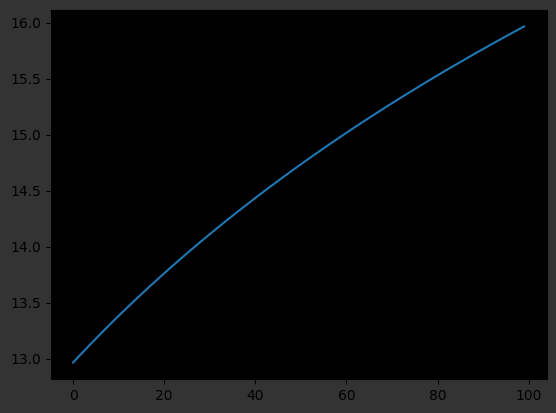

In [32]:
plt.plot(list(map(np.log2, map(lambda x: x**3, b))))

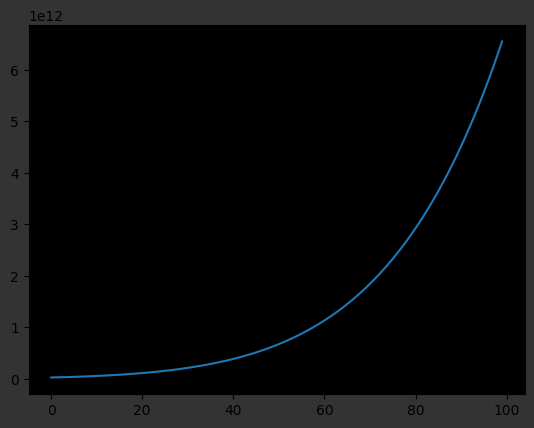

In [33]:
plt.plot(list(map(lambda x: x**8, b)))

In [34]:
x = np.array([[2, -.5],
              [1, .25]])
x

array([[ 2.  , -0.5 ],
       [ 1.  ,  0.25]])

In [35]:
x_inverse = np.linalg.inv(x)

In [36]:
x @ x_inverse

array([[1., 0.],
       [0., 1.]])

In [37]:
x_inverse @ x

array([[1., 0.],
       [0., 1.]])

In [38]:
import sympy as sp
from sympy import latex
x, a, h = sp.symbols(('x', 'a', 'h'))

expr = 3 * x**2 - 2 * x
expr

3*x**2 - 2*x

In [39]:
a_h = expr.subs(x, (a+h))
a = expr.subs(x, a)

In [40]:
expr_ = (a_h - a) / h
expr_

(-3*a**2 - 2*h + 3*(a + h)**2)/h

In [41]:
expr2 = sp.expand(expr_)
expr2

6*a + 3*h - 2

In [42]:
display(expr2.subs(h,0))

6*a - 2

In [43]:
def gradient(co):
    x, a, h = sp.symbols(('x', 'a', 'h'))
    expr = sum(co[i]*x**i for i in range(len(co)))
    display(expr)
    a_h = expr.subs(x, (a+h))
    a = expr.subs(x, a)
    expr_ = (a_h - a) / h
    display(expr_)
    expr__ = sp.expand(expr_)
    display(expr__)
    display(expr__.subs(h,0))

In [44]:
gradient([0, 0, 0, 2, 1, 2, 4])

4*x**6 + 2*x**5 + x**4 + 2*x**3

(-4*a**6 - 2*a**5 - a**4 - 2*a**3 + 4*(a + h)**6 + 2*(a + h)**5 + (a + h)**4 + 2*(a + h)**3)/h

24*a**5 + 60*a**4*h + 10*a**4 + 80*a**3*h**2 + 20*a**3*h + 4*a**3 + 60*a**2*h**3 + 20*a**2*h**2 + 6*a**2*h + 6*a**2 + 24*a*h**4 + 10*a*h**3 + 4*a*h**2 + 6*a*h + 4*h**5 + 2*h**4 + h**3 + 2*h**2

24*a**5 + 10*a**4 + 4*a**3 + 6*a**2

In [45]:
import fractions

In [46]:
dir(fractions)

['Decimal',
 'Fraction',
 '_PyHASH_INF',
 '_PyHASH_MODULUS',
 '_RATIONAL_FORMAT',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'math',
 'numbers',
 'operator',
 're',
 'sys']